In [1]:
# Paper Plots

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

In [4]:
import pickle
import arviz as az
import corner

In [5]:
import antiglitch
from antiglitch import rfft, irfft, Snippet

In [171]:
times = np.arange(-512,512)/8192.
freqs = np.linspace(0, 4096, 513)
shiftvec = np.linspace(0, np.pi, 513)

In [130]:
result = {}
for ifo in ['H1','L1']:
    for key in ['blip', 'koi', 'tomte']:
        with open(f"{ifo}-{key}-results.pkl", 'rb') as handle:
            tmp = pickle.load(handle)
        for ii in range(100):
            means = tmp[(ifo, key, ii)]['mean']
            sds = tmp[(ifo, key, ii)]['sd']
            dct = {k: val for k, val in means.items()}
            dct = dct | {k+'_sd': val for k, val in sds.items()}
            snip = Snippet(ifo, key, ii)
            snip.set_infer(dct)
            dct['snr'] = np.sqrt(np.sum(np.abs(rfft(snip.glitch))**2))
            result[(ifo, key, ii)] = dct

/home/andrew.lundgren/.conda/envs/jax/lib/python3.9/site-packages/antiglitch/utils.py:31: RuntimeWarning: divide by zero encountered in power
  invasd = ((4096.*npz['psd'])**-0.5)[:4097]


In [131]:
blip_ex = Snippet('L1', 'blip', 20)
blip_ex.set_infer(result['L1', 'blip', 20])

tomte_ex = Snippet('H1', 'tomte', 22)
tomte_ex.set_infer(result['H1', 'tomte', 22])

koi_ex = Snippet('L1', 'koi', 13)
koi_ex.set_infer(result[('L1', 'koi', 13)])

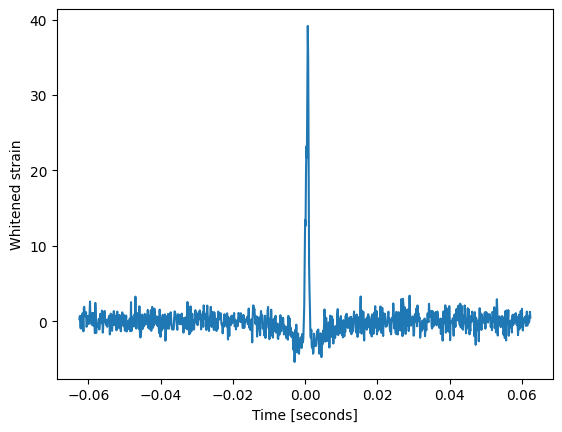

In [80]:
plt.plot(times, blip_ex.whts)
plt.xlabel('Time [seconds]')
plt.ylabel('Whitened strain')
plt.savefig('plots/Example_TS_blip.png')

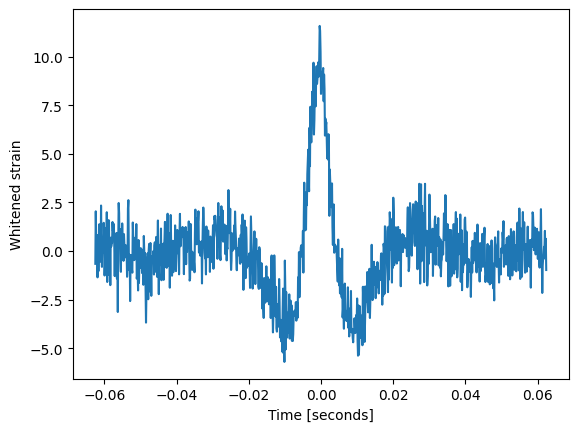

In [81]:
plt.plot(times, tomte_ex.whts)
plt.xlabel('Time [seconds]')
plt.ylabel('Whitened strain')
plt.savefig('plots/Example_TS_tomte.png')

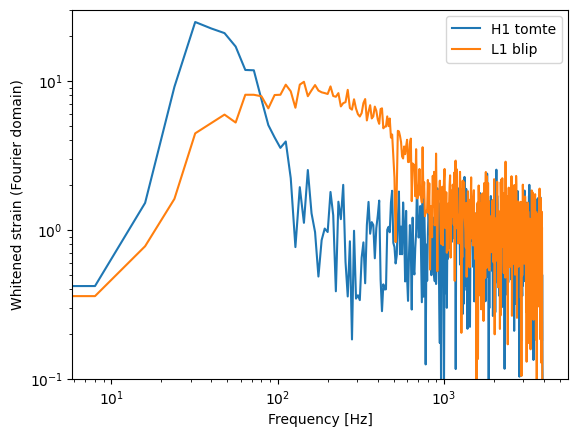

In [84]:
plt.loglog(freqs, np.abs(rfft(tomte_ex.whts)), label='H1 tomte')
plt.loglog(freqs, np.abs(rfft(blip_ex.whts)), label='L1 blip')
plt.ylim(0.1, 30)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Whitened strain (Fourier domain)')
plt.legend(loc='upper right')
plt.savefig('plots/Example_spectra.png')

In [102]:
def td_subtract_plot(snippet):
    fig = plt.figure()
    plt.plot(times, snippet.whts, c='k', label='Whitened data')
    plt.plot(times, snippet.glitch, c='b', lw=1, label='Model')
    plt.plot(times, snippet.whts - snippet.glitch, c='orange', lw=1, label='Residual')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Whitened strain')
    plt.legend(loc='upper right')
    return fig

def fd_subtract_plot(snippet):
    fig = plt.figure()
    plt.loglog(freqs, np.abs(rfft(snippet.whts)), c='k', label='Whitened data')
    plt.loglog(freqs, np.abs(rfft(snippet.glitch)), c='b', lw=1, label='Model')
    plt.loglog(freqs, np.abs(rfft(snippet.whts - snippet.glitch)), c='orange', lw=1, label='Residual')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Whitened strain (Fourier domain)')
    plt.legend(loc='upper right')

(-0.01, 0.01)

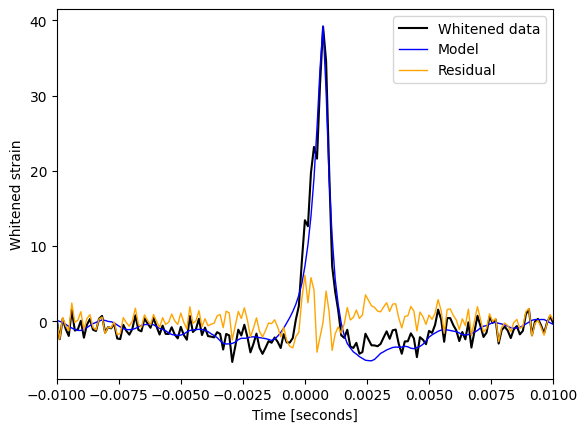

In [101]:
td_subtract_plot(blip_ex)
plt.xlim(-0.01, 0.01)
plt.savefig('plots/Subtraction_blip_TD.png')

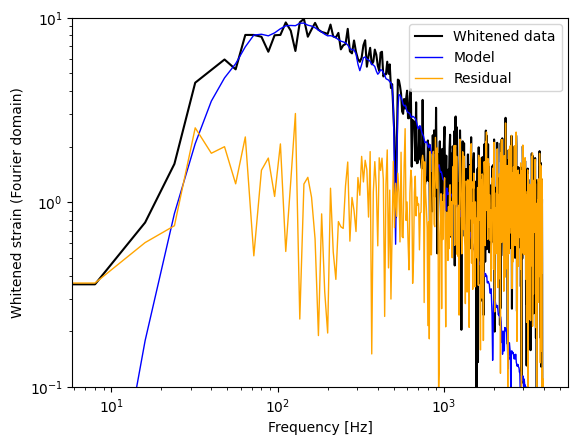

In [103]:
fd_subtract_plot(blip_ex)
plt.ylim(0.1, 10)
plt.savefig('plots/Subtraction_blip_FD.png')

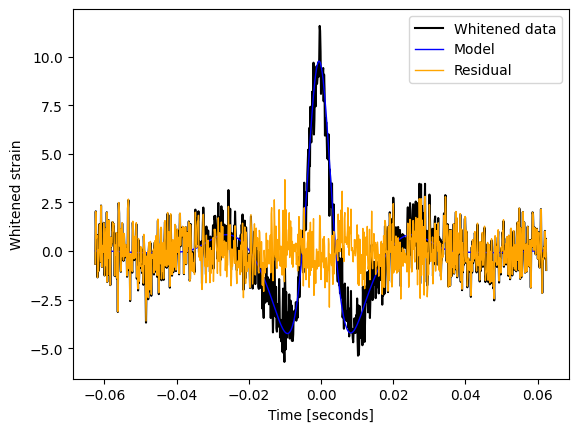

In [108]:
td_subtract_plot(tomte_ex)
#plt.xlim(-0.01, 0.01)
plt.savefig('plots/Subtraction_tomte_TD.png')

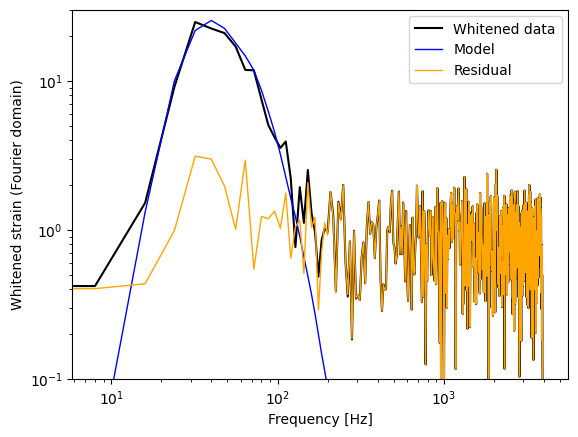

In [110]:
fd_subtract_plot(tomte_ex)
plt.ylim(0.1, 30)
plt.savefig('plots/Subtraction_tomte_FD.png')

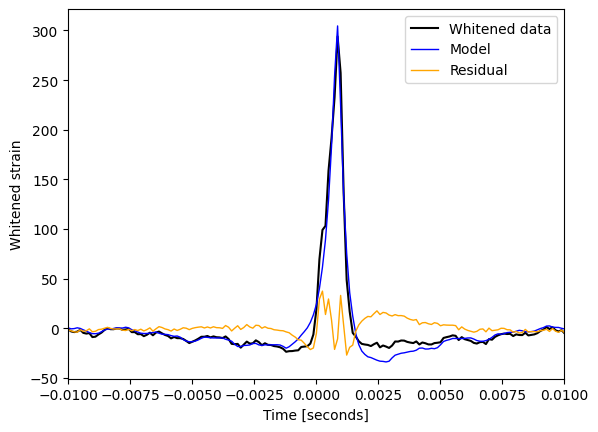

In [104]:
td_subtract_plot(koi_ex)
plt.xlim(-0.01, 0.01)
plt.savefig('plots/Subtraction_koi_TD.png')

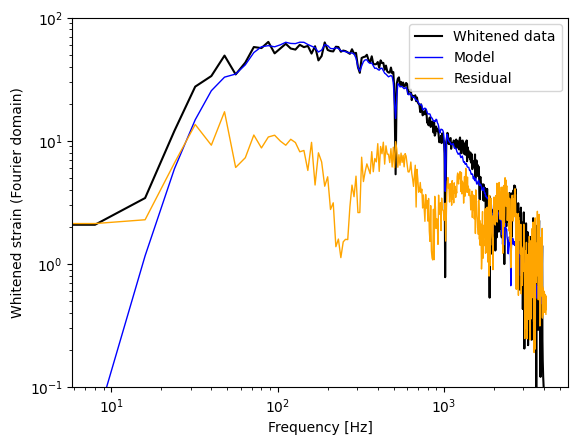

In [105]:
fd_subtract_plot(koi_ex)
plt.ylim(0.1, 100)
plt.savefig('plots/Subtraction_koi_FD.png')

## Section 4 - Results

(0.1, 30)

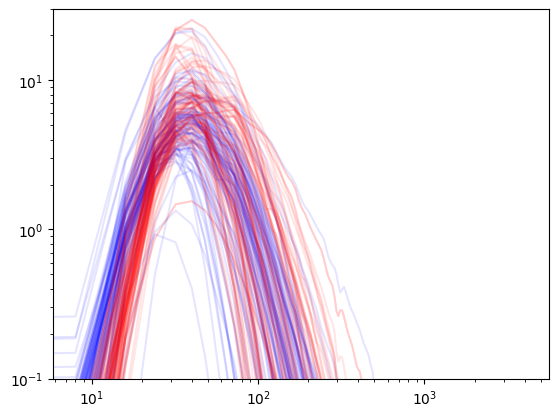

In [114]:
for ii in range(100):
    snip = Snippet('L1','tomte',ii)
    snip.set_infer(result[('L1', 'tomte', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
for ii in range(100):
    snip = Snippet('H1','tomte',ii)
    snip.set_infer(result[('H1', 'tomte', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='r', alpha=0.1)
plt.ylim(0.1,30)

(0.1, 30)

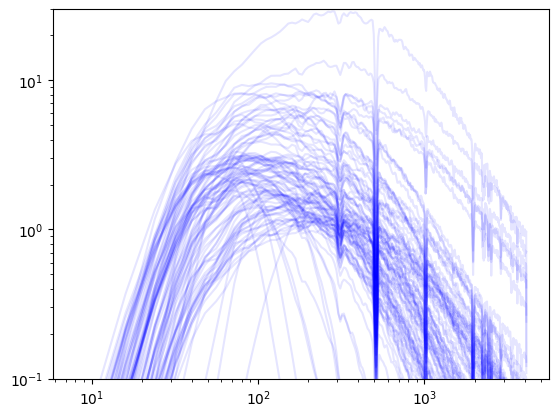

In [116]:
for ii in range(100):
    snip = Snippet('L1','blip',ii)
    snip.set_infer(result[('L1', 'blip', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
plt.ylim(0.1,30)

(0.1, 300)

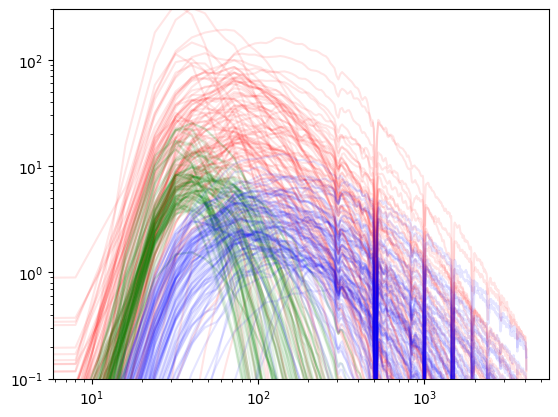

In [122]:
for ii in range(100):
    snip = Snippet('H1','koi',ii)
    snip.set_infer(result[('H1', 'koi', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='r', alpha=0.1)

for ii in range(100):
    snip = Snippet('H1','tomte',ii)
    snip.set_infer(result[('H1', 'tomte', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='g', alpha=0.1)
    
for ii in range(100):
    snip = Snippet('H1','blip',ii)
    snip.set_infer(result[('H1', 'blip', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
plt.ylim(0.1,300)


(0.1, 300)

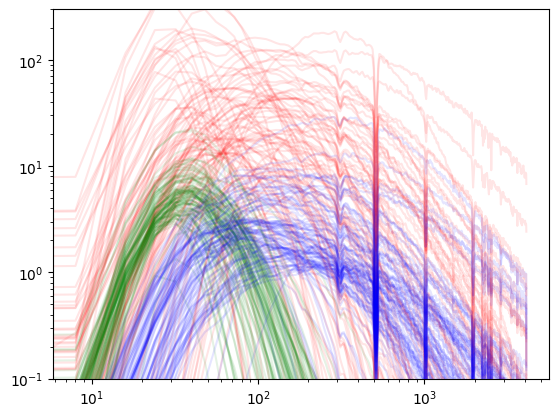

In [123]:
for ii in range(100):
    snip = Snippet('L1','koi',ii)
    snip.set_infer(result[('L1', 'koi', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='r', alpha=0.1)

for ii in range(100):
    snip = Snippet('L1','tomte',ii)
    snip.set_infer(result[('L1', 'tomte', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='g', alpha=0.1)
    
for ii in range(100):
    snip = Snippet('L1','blip',ii)
    snip.set_infer(result[('L1', 'blip', ii)])
    plt.loglog(freqs, np.abs(rfft(snip.glitch)), c='b', alpha=0.1)
plt.ylim(0.1,300)


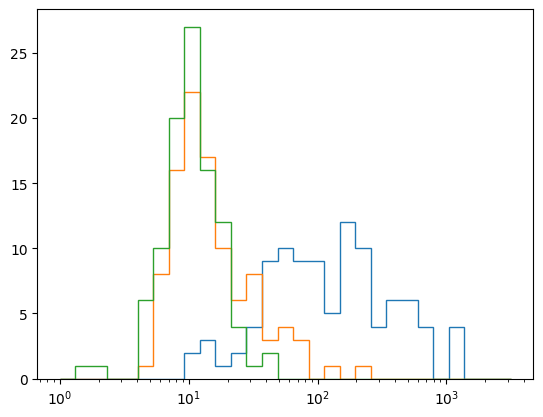

In [153]:
plt.hist([result['L1', 'koi', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Koi');
plt.hist([result['L1', 'blip', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Blip');
plt.hist([result['L1', 'tomte', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Tomte');
plt.xscale('log')
plt.savefig('plots/Histogram_SNR_dist_L1.png')

In [150]:
np.log10(2000)

3.3010299956639813

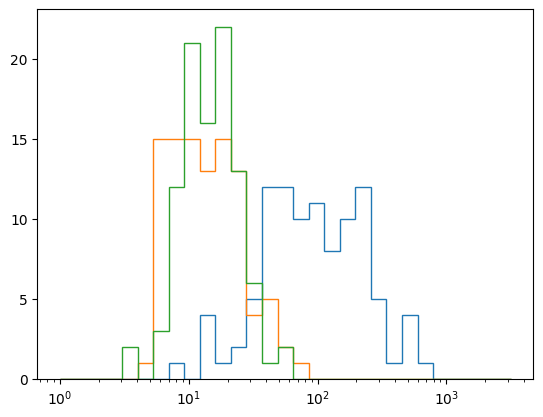

In [152]:
plt.hist([result['H1', 'koi', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Koi');
plt.hist([result['H1', 'blip', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Blip');
plt.hist([result['H1', 'tomte', ii]['snr'] for ii in range(100)], bins=np.logspace(0,3.5, 30), histtype='step', label='Tomte');
plt.xscale('log')
plt.savefig('plots/Histogram_SNR_dist_H1.png')

In [172]:
def stack_glitches(ifo, kind, expr):
    stack = 0.
    pred = 0.
    accum = []
    for ii in range(100):
        key = (ifo, kind, ii)
        inf = result[key]
        if eval(expr, {'inf': inf}):
            snip = antiglitch.Snippet(*key)
            snip.set_infer(inf)
            stack += rfft(snip.whts)*np.exp(1.j*inf['time']*shiftvec)
            pred += rfft(snip.glitch)*np.exp(1.j*inf['time']*shiftvec)
            accum.append(rfft(snip.whts)*np.exp(1.j*inf['time']*shiftvec))
    return (stack, pred, accum)

In [189]:
stack, pred, accum = stack_glitches('H1', 'koi', "inf['snr'] < 300 and inf['amp_r'] < -10")

(0.1, 1000)

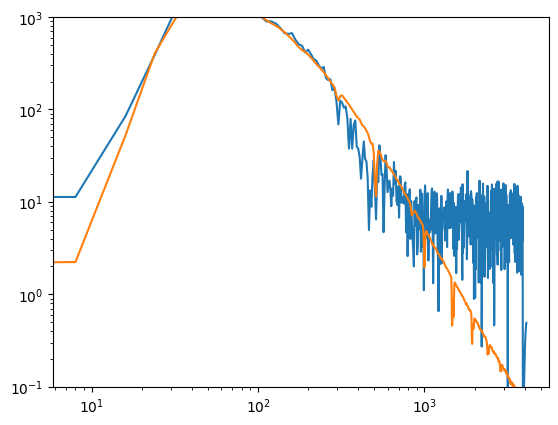

In [190]:
plt.loglog(freqs, np.abs(stack))
plt.loglog(freqs, np.abs(pred))
plt.ylim(0.1,1000)

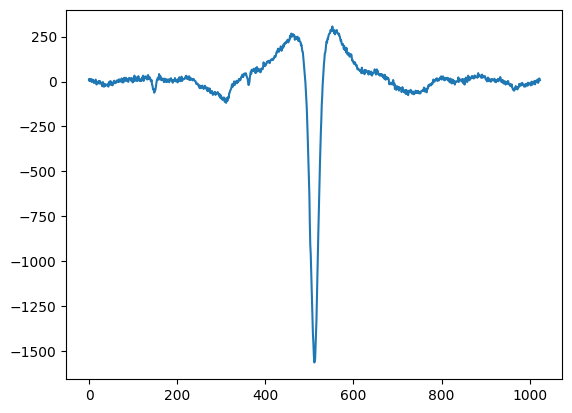

In [191]:
plt.plot(irfft(stack))

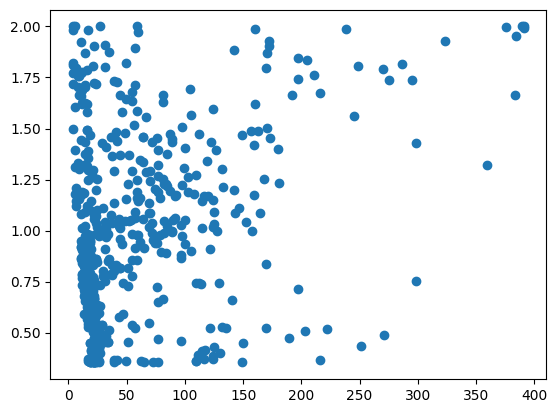

In [206]:
plt.scatter([4096/np.pi*r['f0'] for r in result.values()],
            [r['gbw']**-0.5 for r in result.values()])